# PyTorch从零实现线性回归

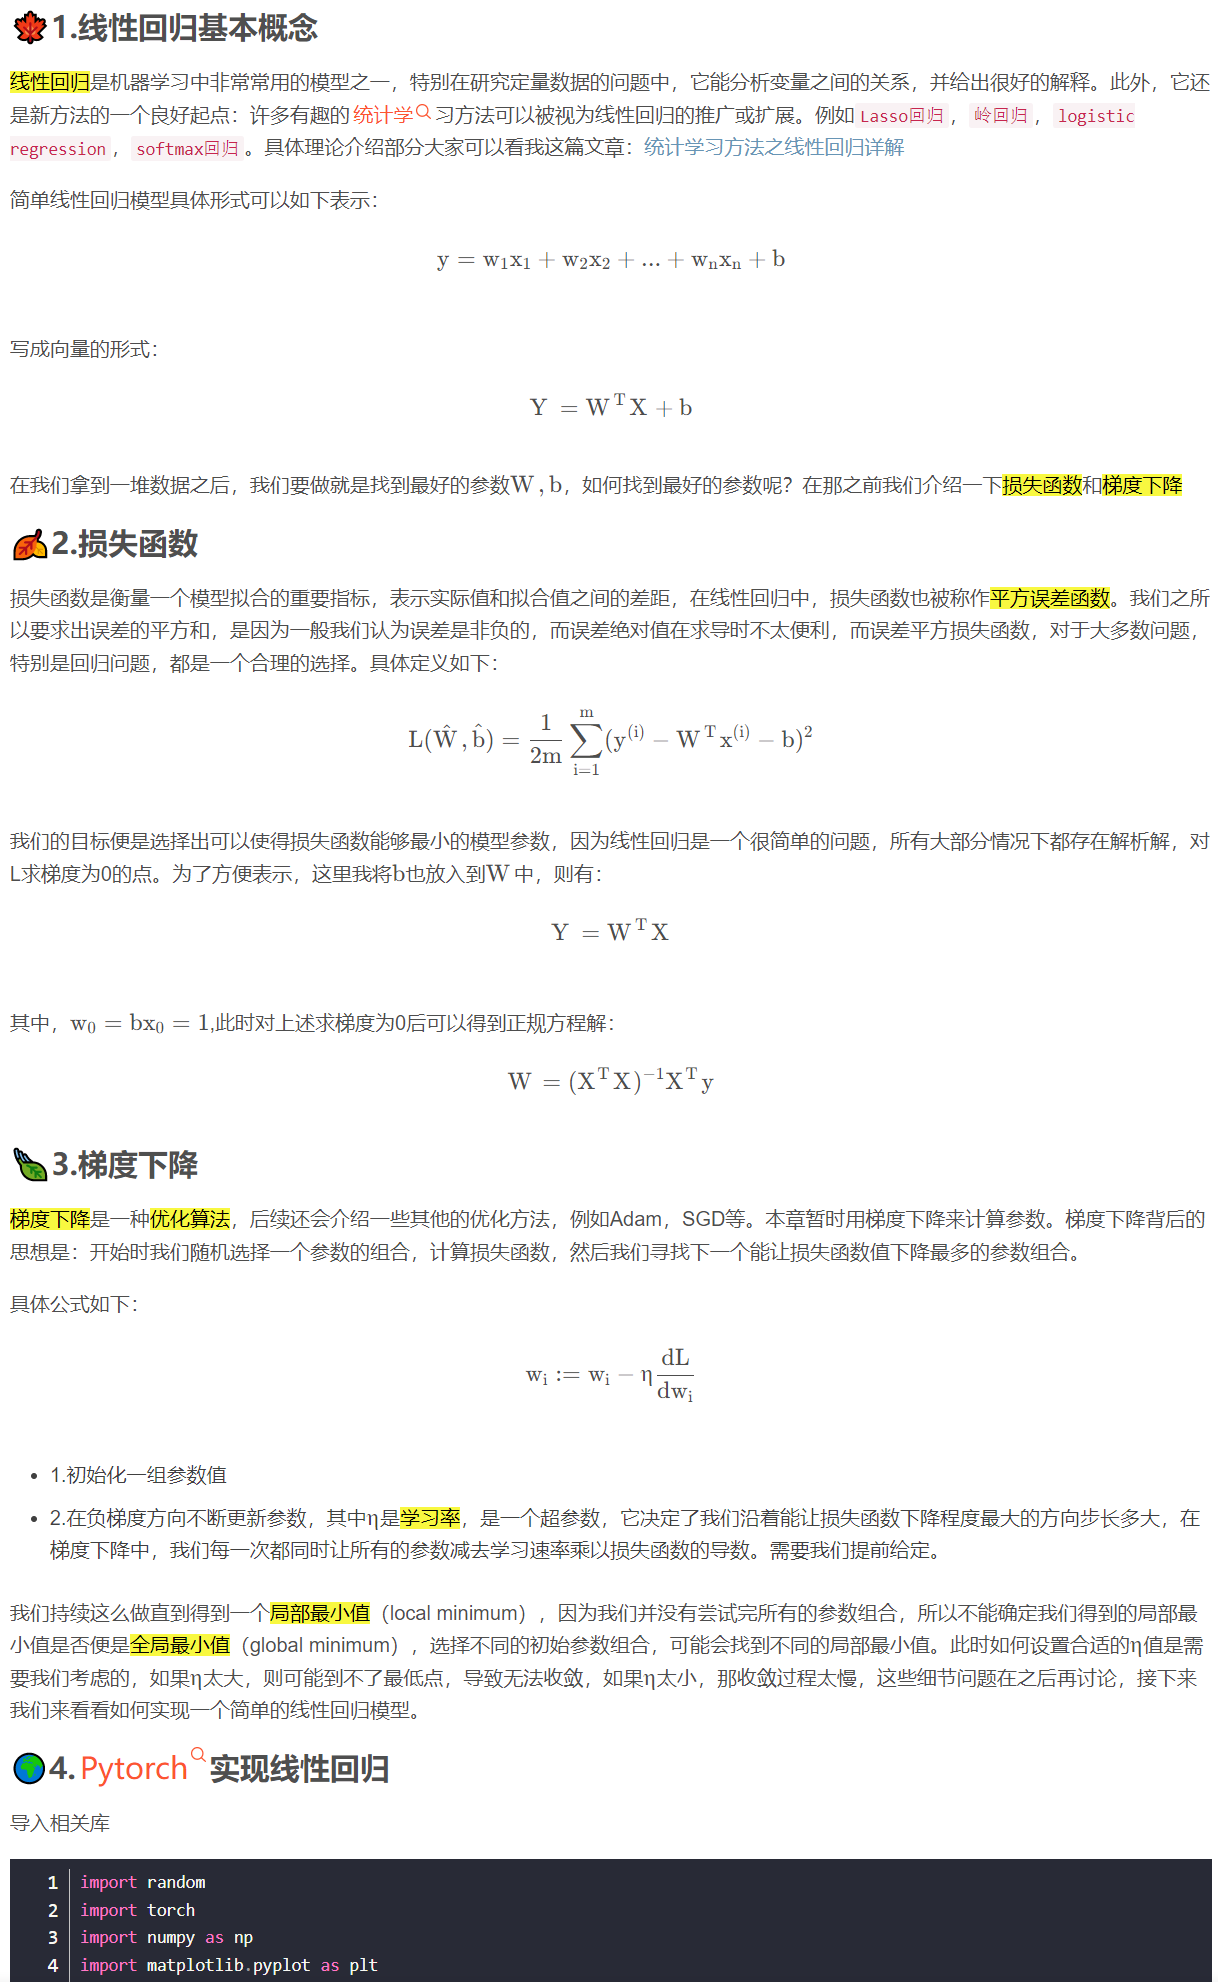

In [2]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt #画图展示
%matplotlib inline

# 生成数据集

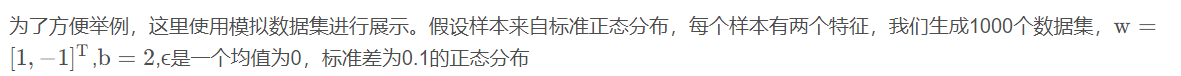

In [3]:
def simulation_data(w,b,n):
    X = torch.normal(0,0.1,(n,len(w)))  #生成标准正态分布     torch.normal(均值，标准差，（输出张量）)
    y = torch.matmul(X, w)+b          #计算回归拟合值
    y += torch.normal(0,0.1,y.shape)  #加上随机扰动项
    return X , y.reshape((-1,1))

true_w = torch.tensor([-1,1],dtype=torch.float32)
true_b = 2

features, target = simulation_data(true_w,true_b,1000)

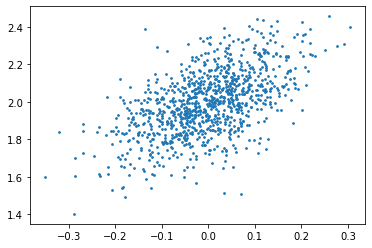

In [5]:
#此时已经生成好了模拟数据集，下面我们绘制图形观察一下   
plt.scatter( features[:,(1)].detach().numpy(),     target.detach().numpy() , 3)  #输入数据，绘图查看 3指点的大小

# 初始化参数
下面我们开始初始化我们要求的参数,通常将w 设置为均值为0的正态分布，b 设置为0向量

In [6]:
w = torch.normal(0,0.1,(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
w,b

(tensor([[0.0347],
         [0.2731]], requires_grad=True),
 tensor([0.], requires_grad=True))

# 定义回归模型
初始化参数之后，我们下一步就是开始定义我们的线性回归模型

In [7]:
def reg(X,w,b):
    return torch.matmul(X,w)+b

# 计算损失函数

In [8]:
def loss_fun(y_hat,y):
    return(y_hat-y)**2 / (2*len(y))

# 使用梯度下降求解参数

In [9]:
def gd(params,n):
    with torch.no_grad():#在外面不需要求解梯度，只有参数更新的时候求参数
        for param in params:
            param -= n*param.grad#进行梯度下降
            param.grad.zero_()#重新将梯度设置为0，这样就不会受到上一次影响
          

# 开始训练

In [10]:
n = 0.1#学习率    大家可以尝试使用其他的学习率，来看一下结果的差异性，一般较常用的是0.01 0.03 0.1 0.3 
num_epochs = 5000#训练次数
net = reg
loss = loss_fun
X = features
y = target
for epoch in range(num_epochs):
    l = loss(reg(X,w,b),y)      #计算损失函数
    l.sum().backward()          #反向传播求梯度
    gd([w,b],n)                 #更新参数
    with torch.no_grad():
        train = loss(net(features,w,b),target)
        print(f'epoch{epoch+1},loss：{float(train.mean()):f}')
        

epoch1,loss：0.001884
epoch2,loss：0.001773
epoch3,loss：0.001669
epoch4,loss：0.001571
epoch5,loss：0.001479
epoch6,loss：0.001393
epoch7,loss：0.001311
epoch8,loss：0.001234
epoch9,loss：0.001162
epoch10,loss：0.001094
epoch11,loss：0.001030
epoch12,loss：0.000970
epoch13,loss：0.000914
epoch14,loss：0.000860
epoch15,loss：0.000810
epoch16,loss：0.000763
epoch17,loss：0.000719
epoch18,loss：0.000677
epoch19,loss：0.000638
epoch20,loss：0.000601
epoch21,loss：0.000566
epoch22,loss：0.000533
epoch23,loss：0.000503
epoch24,loss：0.000474
epoch25,loss：0.000447
epoch26,loss：0.000421
epoch27,loss：0.000397
epoch28,loss：0.000374
epoch29,loss：0.000353
epoch30,loss：0.000333
epoch31,loss：0.000314
epoch32,loss：0.000296
epoch33,loss：0.000279
epoch34,loss：0.000264
epoch35,loss：0.000249
epoch36,loss：0.000235
epoch37,loss：0.000222
epoch38,loss：0.000209
epoch39,loss：0.000198
epoch40,loss：0.000187
epoch41,loss：0.000176
epoch42,loss：0.000167
epoch43,loss：0.000158
epoch44,loss：0.000149
epoch45,loss：0.000141
epoch46,loss：0.0001

epoch439,loss：0.000011
epoch440,loss：0.000011
epoch441,loss：0.000011
epoch442,loss：0.000011
epoch443,loss：0.000011
epoch444,loss：0.000011
epoch445,loss：0.000011
epoch446,loss：0.000011
epoch447,loss：0.000011
epoch448,loss：0.000011
epoch449,loss：0.000011
epoch450,loss：0.000011
epoch451,loss：0.000011
epoch452,loss：0.000011
epoch453,loss：0.000011
epoch454,loss：0.000011
epoch455,loss：0.000011
epoch456,loss：0.000011
epoch457,loss：0.000011
epoch458,loss：0.000011
epoch459,loss：0.000011
epoch460,loss：0.000011
epoch461,loss：0.000011
epoch462,loss：0.000011
epoch463,loss：0.000011
epoch464,loss：0.000011
epoch465,loss：0.000011
epoch466,loss：0.000011
epoch467,loss：0.000011
epoch468,loss：0.000011
epoch469,loss：0.000011
epoch470,loss：0.000011
epoch471,loss：0.000011
epoch472,loss：0.000011
epoch473,loss：0.000011
epoch474,loss：0.000011
epoch475,loss：0.000011
epoch476,loss：0.000011
epoch477,loss：0.000011
epoch478,loss：0.000011
epoch479,loss：0.000011
epoch480,loss：0.000011
epoch481,loss：0.000011
epoch482,lo

epoch910,loss：0.000010
epoch911,loss：0.000010
epoch912,loss：0.000010
epoch913,loss：0.000010
epoch914,loss：0.000010
epoch915,loss：0.000010
epoch916,loss：0.000010
epoch917,loss：0.000010
epoch918,loss：0.000010
epoch919,loss：0.000010
epoch920,loss：0.000010
epoch921,loss：0.000010
epoch922,loss：0.000010
epoch923,loss：0.000010
epoch924,loss：0.000010
epoch925,loss：0.000010
epoch926,loss：0.000010
epoch927,loss：0.000010
epoch928,loss：0.000010
epoch929,loss：0.000010
epoch930,loss：0.000010
epoch931,loss：0.000010
epoch932,loss：0.000010
epoch933,loss：0.000010
epoch934,loss：0.000010
epoch935,loss：0.000010
epoch936,loss：0.000010
epoch937,loss：0.000010
epoch938,loss：0.000010
epoch939,loss：0.000010
epoch940,loss：0.000010
epoch941,loss：0.000010
epoch942,loss：0.000010
epoch943,loss：0.000010
epoch944,loss：0.000010
epoch945,loss：0.000010
epoch946,loss：0.000010
epoch947,loss：0.000010
epoch948,loss：0.000010
epoch949,loss：0.000010
epoch950,loss：0.000010
epoch951,loss：0.000010
epoch952,loss：0.000010
epoch953,lo

epoch1368,loss：0.000009
epoch1369,loss：0.000009
epoch1370,loss：0.000009
epoch1371,loss：0.000009
epoch1372,loss：0.000009
epoch1373,loss：0.000009
epoch1374,loss：0.000009
epoch1375,loss：0.000009
epoch1376,loss：0.000009
epoch1377,loss：0.000009
epoch1378,loss：0.000009
epoch1379,loss：0.000009
epoch1380,loss：0.000009
epoch1381,loss：0.000009
epoch1382,loss：0.000009
epoch1383,loss：0.000009
epoch1384,loss：0.000009
epoch1385,loss：0.000008
epoch1386,loss：0.000008
epoch1387,loss：0.000008
epoch1388,loss：0.000008
epoch1389,loss：0.000008
epoch1390,loss：0.000008
epoch1391,loss：0.000008
epoch1392,loss：0.000008
epoch1393,loss：0.000008
epoch1394,loss：0.000008
epoch1395,loss：0.000008
epoch1396,loss：0.000008
epoch1397,loss：0.000008
epoch1398,loss：0.000008
epoch1399,loss：0.000008
epoch1400,loss：0.000008
epoch1401,loss：0.000008
epoch1402,loss：0.000008
epoch1403,loss：0.000008
epoch1404,loss：0.000008
epoch1405,loss：0.000008
epoch1406,loss：0.000008
epoch1407,loss：0.000008
epoch1408,loss：0.000008
epoch1409,loss：0

epoch1830,loss：0.000008
epoch1831,loss：0.000008
epoch1832,loss：0.000008
epoch1833,loss：0.000008
epoch1834,loss：0.000008
epoch1835,loss：0.000008
epoch1836,loss：0.000008
epoch1837,loss：0.000008
epoch1838,loss：0.000008
epoch1839,loss：0.000008
epoch1840,loss：0.000008
epoch1841,loss：0.000008
epoch1842,loss：0.000008
epoch1843,loss：0.000008
epoch1844,loss：0.000008
epoch1845,loss：0.000008
epoch1846,loss：0.000008
epoch1847,loss：0.000008
epoch1848,loss：0.000008
epoch1849,loss：0.000008
epoch1850,loss：0.000008
epoch1851,loss：0.000008
epoch1852,loss：0.000008
epoch1853,loss：0.000008
epoch1854,loss：0.000008
epoch1855,loss：0.000008
epoch1856,loss：0.000008
epoch1857,loss：0.000008
epoch1858,loss：0.000008
epoch1859,loss：0.000008
epoch1860,loss：0.000008
epoch1861,loss：0.000008
epoch1862,loss：0.000008
epoch1863,loss：0.000008
epoch1864,loss：0.000008
epoch1865,loss：0.000008
epoch1866,loss：0.000008
epoch1867,loss：0.000008
epoch1868,loss：0.000008
epoch1869,loss：0.000008
epoch1870,loss：0.000008
epoch1871,loss：0

epoch2297,loss：0.000007
epoch2298,loss：0.000007
epoch2299,loss：0.000007
epoch2300,loss：0.000007
epoch2301,loss：0.000007
epoch2302,loss：0.000007
epoch2303,loss：0.000007
epoch2304,loss：0.000007
epoch2305,loss：0.000007
epoch2306,loss：0.000007
epoch2307,loss：0.000007
epoch2308,loss：0.000007
epoch2309,loss：0.000007
epoch2310,loss：0.000007
epoch2311,loss：0.000007
epoch2312,loss：0.000007
epoch2313,loss：0.000007
epoch2314,loss：0.000007
epoch2315,loss：0.000007
epoch2316,loss：0.000007
epoch2317,loss：0.000007
epoch2318,loss：0.000007
epoch2319,loss：0.000007
epoch2320,loss：0.000007
epoch2321,loss：0.000007
epoch2322,loss：0.000007
epoch2323,loss：0.000007
epoch2324,loss：0.000007
epoch2325,loss：0.000007
epoch2326,loss：0.000007
epoch2327,loss：0.000007
epoch2328,loss：0.000007
epoch2329,loss：0.000007
epoch2330,loss：0.000007
epoch2331,loss：0.000007
epoch2332,loss：0.000007
epoch2333,loss：0.000007
epoch2334,loss：0.000007
epoch2335,loss：0.000007
epoch2336,loss：0.000007
epoch2337,loss：0.000007
epoch2338,loss：0

epoch2754,loss：0.000006
epoch2755,loss：0.000006
epoch2756,loss：0.000006
epoch2757,loss：0.000006
epoch2758,loss：0.000006
epoch2759,loss：0.000006
epoch2760,loss：0.000006
epoch2761,loss：0.000006
epoch2762,loss：0.000006
epoch2763,loss：0.000006
epoch2764,loss：0.000006
epoch2765,loss：0.000006
epoch2766,loss：0.000006
epoch2767,loss：0.000006
epoch2768,loss：0.000006
epoch2769,loss：0.000006
epoch2770,loss：0.000006
epoch2771,loss：0.000006
epoch2772,loss：0.000006
epoch2773,loss：0.000006
epoch2774,loss：0.000006
epoch2775,loss：0.000006
epoch2776,loss：0.000006
epoch2777,loss：0.000006
epoch2778,loss：0.000006
epoch2779,loss：0.000006
epoch2780,loss：0.000006
epoch2781,loss：0.000006
epoch2782,loss：0.000006
epoch2783,loss：0.000006
epoch2784,loss：0.000006
epoch2785,loss：0.000006
epoch2786,loss：0.000006
epoch2787,loss：0.000006
epoch2788,loss：0.000006
epoch2789,loss：0.000006
epoch2790,loss：0.000006
epoch2791,loss：0.000006
epoch2792,loss：0.000006
epoch2793,loss：0.000006
epoch2794,loss：0.000006
epoch2795,loss：0

epoch3191,loss：0.000006
epoch3192,loss：0.000006
epoch3193,loss：0.000006
epoch3194,loss：0.000006
epoch3195,loss：0.000006
epoch3196,loss：0.000006
epoch3197,loss：0.000006
epoch3198,loss：0.000006
epoch3199,loss：0.000006
epoch3200,loss：0.000006
epoch3201,loss：0.000006
epoch3202,loss：0.000006
epoch3203,loss：0.000006
epoch3204,loss：0.000006
epoch3205,loss：0.000006
epoch3206,loss：0.000006
epoch3207,loss：0.000006
epoch3208,loss：0.000006
epoch3209,loss：0.000006
epoch3210,loss：0.000006
epoch3211,loss：0.000006
epoch3212,loss：0.000006
epoch3213,loss：0.000006
epoch3214,loss：0.000006
epoch3215,loss：0.000006
epoch3216,loss：0.000006
epoch3217,loss：0.000006
epoch3218,loss：0.000006
epoch3219,loss：0.000006
epoch3220,loss：0.000006
epoch3221,loss：0.000006
epoch3222,loss：0.000006
epoch3223,loss：0.000006
epoch3224,loss：0.000006
epoch3225,loss：0.000006
epoch3226,loss：0.000006
epoch3227,loss：0.000006
epoch3228,loss：0.000006
epoch3229,loss：0.000006
epoch3230,loss：0.000006
epoch3231,loss：0.000006
epoch3232,loss：0

epoch3642,loss：0.000006
epoch3643,loss：0.000006
epoch3644,loss：0.000006
epoch3645,loss：0.000006
epoch3646,loss：0.000006
epoch3647,loss：0.000006
epoch3648,loss：0.000006
epoch3649,loss：0.000006
epoch3650,loss：0.000006
epoch3651,loss：0.000006
epoch3652,loss：0.000006
epoch3653,loss：0.000006
epoch3654,loss：0.000006
epoch3655,loss：0.000006
epoch3656,loss：0.000006
epoch3657,loss：0.000006
epoch3658,loss：0.000006
epoch3659,loss：0.000006
epoch3660,loss：0.000006
epoch3661,loss：0.000006
epoch3662,loss：0.000006
epoch3663,loss：0.000006
epoch3664,loss：0.000006
epoch3665,loss：0.000006
epoch3666,loss：0.000006
epoch3667,loss：0.000006
epoch3668,loss：0.000006
epoch3669,loss：0.000006
epoch3670,loss：0.000006
epoch3671,loss：0.000006
epoch3672,loss：0.000006
epoch3673,loss：0.000006
epoch3674,loss：0.000006
epoch3675,loss：0.000006
epoch3676,loss：0.000006
epoch3677,loss：0.000006
epoch3678,loss：0.000006
epoch3679,loss：0.000006
epoch3680,loss：0.000006
epoch3681,loss：0.000006
epoch3682,loss：0.000006
epoch3683,loss：0

epoch4075,loss：0.000006
epoch4076,loss：0.000006
epoch4077,loss：0.000006
epoch4078,loss：0.000006
epoch4079,loss：0.000006
epoch4080,loss：0.000006
epoch4081,loss：0.000006
epoch4082,loss：0.000006
epoch4083,loss：0.000006
epoch4084,loss：0.000006
epoch4085,loss：0.000006
epoch4086,loss：0.000006
epoch4087,loss：0.000006
epoch4088,loss：0.000006
epoch4089,loss：0.000006
epoch4090,loss：0.000006
epoch4091,loss：0.000006
epoch4092,loss：0.000006
epoch4093,loss：0.000006
epoch4094,loss：0.000006
epoch4095,loss：0.000006
epoch4096,loss：0.000006
epoch4097,loss：0.000006
epoch4098,loss：0.000006
epoch4099,loss：0.000006
epoch4100,loss：0.000006
epoch4101,loss：0.000006
epoch4102,loss：0.000006
epoch4103,loss：0.000006
epoch4104,loss：0.000006
epoch4105,loss：0.000006
epoch4106,loss：0.000006
epoch4107,loss：0.000006
epoch4108,loss：0.000006
epoch4109,loss：0.000006
epoch4110,loss：0.000006
epoch4111,loss：0.000006
epoch4112,loss：0.000006
epoch4113,loss：0.000006
epoch4114,loss：0.000006
epoch4115,loss：0.000006
epoch4116,loss：0

epoch4523,loss：0.000005
epoch4524,loss：0.000005
epoch4525,loss：0.000005
epoch4526,loss：0.000005
epoch4527,loss：0.000005
epoch4528,loss：0.000005
epoch4529,loss：0.000005
epoch4530,loss：0.000005
epoch4531,loss：0.000005
epoch4532,loss：0.000005
epoch4533,loss：0.000005
epoch4534,loss：0.000005
epoch4535,loss：0.000005
epoch4536,loss：0.000005
epoch4537,loss：0.000005
epoch4538,loss：0.000005
epoch4539,loss：0.000005
epoch4540,loss：0.000005
epoch4541,loss：0.000005
epoch4542,loss：0.000005
epoch4543,loss：0.000005
epoch4544,loss：0.000005
epoch4545,loss：0.000005
epoch4546,loss：0.000005
epoch4547,loss：0.000005
epoch4548,loss：0.000005
epoch4549,loss：0.000005
epoch4550,loss：0.000005
epoch4551,loss：0.000005
epoch4552,loss：0.000005
epoch4553,loss：0.000005
epoch4554,loss：0.000005
epoch4555,loss：0.000005
epoch4556,loss：0.000005
epoch4557,loss：0.000005
epoch4558,loss：0.000005
epoch4559,loss：0.000005
epoch4560,loss：0.000005
epoch4561,loss：0.000005
epoch4562,loss：0.000005
epoch4563,loss：0.000005
epoch4564,loss：0

epoch4963,loss：0.000005
epoch4964,loss：0.000005
epoch4965,loss：0.000005
epoch4966,loss：0.000005
epoch4967,loss：0.000005
epoch4968,loss：0.000005
epoch4969,loss：0.000005
epoch4970,loss：0.000005
epoch4971,loss：0.000005
epoch4972,loss：0.000005
epoch4973,loss：0.000005
epoch4974,loss：0.000005
epoch4975,loss：0.000005
epoch4976,loss：0.000005
epoch4977,loss：0.000005
epoch4978,loss：0.000005
epoch4979,loss：0.000005
epoch4980,loss：0.000005
epoch4981,loss：0.000005
epoch4982,loss：0.000005
epoch4983,loss：0.000005
epoch4984,loss：0.000005
epoch4985,loss：0.000005
epoch4986,loss：0.000005
epoch4987,loss：0.000005
epoch4988,loss：0.000005
epoch4989,loss：0.000005
epoch4990,loss：0.000005
epoch4991,loss：0.000005
epoch4992,loss：0.000005
epoch4993,loss：0.000005
epoch4994,loss：0.000005
epoch4995,loss：0.000005
epoch4996,loss：0.000005
epoch4997,loss：0.000005
epoch4998,loss：0.000005
epoch4999,loss：0.000005
epoch5000,loss：0.000005


In [11]:
#结果对比
print(w.T,b)
print(true_w,true_b)

tensor([[-0.7809,  0.8337]], grad_fn=<PermuteBackward0>) tensor([1.9999], requires_grad=True)
tensor([-1.,  1.]) 2


# ______________

# 简洁代码实现线性神经网络

上面我们学习了如何使用pytorch从零实现一个线性回归模型。包括生成数据集，构建损失函数，梯度下降优化求解参数等。和很多其他机器学习框架一样，pytorch中也包含了许多可以自动实现机器学习的包。本章介绍一些如何使用nn简便的实现一个线性回归模型

# 1.生成数据集

In [14]:
import numpy as np
import torch
from torch.utils import data

In [16]:
#接下来我们定义真实的w和b，以及生成模拟数据集，这一步和之前讲的一样
def synthetic_data(w, b, num_examples):  
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

# 2.读取数据集
下面有一点不同的是我们通过data.TensorDataset把数据放在Tensor结构中，如何通过batch_size来设置每次抽取几个样本

In [17]:
def load_array(data_arrays,batch_size,is_train=True):
    # TensorDataset:将数据对应成Tensor列表
    data_set = data.TensorDataset(*data_arrays)
    return data.DataLoader(data_set,batch_size,shuffle=is_train)#将数据加载读取出来，batch_size定义个数
batch_size = 10
data_iter = load_array((features,labels),batch_size)

In [18]:
next(iter(data_iter))

[tensor([[-0.6509,  1.4344],
         [ 1.1445, -0.1143],
         [ 0.6957, -0.5931],
         [ 0.2705, -0.0984],
         [-1.0513,  0.6488],
         [ 0.1889, -0.3191],
         [-1.0984,  0.1793],
         [-0.6040,  1.3352],
         [-0.3392, -0.0708],
         [-0.2980, -1.4250]]),
 tensor([[-1.9829],
         [ 6.8852],
         [ 7.5977],
         [ 5.0852],
         [-0.0940],
         [ 5.6652],
         [ 1.3866],
         [-1.5376],
         [ 3.7725],
         [ 8.4616]])]

# 3.线性模型搭建

In [19]:
#这里我们通过nn搭建一个线性的神经网络
from torch import nn


In [20]:
'''
这里我们使用Sequential类来接收线性层，这里我们只有一个线性神经网络层，其实可以不设置，但是在后续我们介绍的其他算法中，往往都是多层的，因此我们可以把这个当做一个标准化流程。
它的作用是将不同层串在一起，首先将数据传入到第一层，然后将第一层的输出传入到第二层作为输入，以此类推
'''
net = nn.Sequential(
        nn.Linear(2,1)
)#第一个参数表示输入特征的纬度，第二个参数表示输出层的纬度


# 4.初始化参数

在定义net之后，我们需要做的就是定义我们要估计的参数。还是和之前类似，这里我们也需要定义两个参数一个是weight相当于之前的w，一个是bias相当于之前的b

In [22]:
net[0].weight.data.normal_(0, 0.01)#第一层的weight初始化
net[0].bias.data.fill_(0)#第一层的bias初始化

tensor([0.])

# 5. 定义损失函数

In [23]:
#这里我们使用均方误差MSE来作为我们的损失函数
loss = nn.MSELoss()

# 6. 选择优化方法

这里我们使用随机梯度下降进行优化。从而得到我们的参数.需要传入两个参数，一个是待估计参数，另一个是学习率。我在这里设置为0.03

In [24]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [25]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()#更新参数
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000283
epoch 2, loss 0.000106
epoch 3, loss 0.000106


# 7.完整代码

In [1]:
# 导入相关库
import numpy as np
import torch
from torch.utils import data
from torch import nn
'''
定义模拟数据集函数
'''
def synthetic_data(w, b, num_examples):  
    X = torch.normal(0, 1, (num_examples, len(w)))#生成标准正态分布
    y = torch.matmul(X, w) + b#计算y
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

'''
生成数据集
'''
true_w = torch.tensor([2, -3.4])#定义w
true_b = 4.2#定义b
features, labels = synthetic_data(true_w, true_b, 1000)#生成模拟数据集

'''
加载数据集
'''
def load_array(data_arrays,batch_size,is_train=True):
    # TensorDataset:将数据对应成Tensor列表
    data_set = data.TensorDataset(*data_arrays)
    return data.DataLoader(data_set,batch_size,shuffle=is_train)#将数据加载读取出来，batch_size定义个数
batch_size = 10
data_iter = load_array((features,labels),batch_size)
'''
创建线性神经网络
'''
net = nn.Sequential(nn.Linear(2,1))#第一个参数表示输入特征的纬度，第二个参数表示输出层的纬度
net[0].weight.data.normal_(0, 0.01)#第一层的weight初始化
net[0].bias.data.fill_(0)#第一层的bias初始化
'''
定义损失函数MSE
'''
loss = nn.MSELoss()

'''
创建SGD优化方法
'''
trainer = torch.optim.SGD(net.parameters(), lr=0.03)#创建SGD优化训练器
'''
正式训练
'''
num_epochs = 1000#迭代次数
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)#计算损失函数
        trainer.zero_grad()
        l.backward()
        trainer.step()#更新参数
    l = loss(net(features), labels)#计算最终的loss
    print(f'epoch {epoch + 1}, loss {l:f}')

D:\ANnaconda\envs\HBHB\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch 1, loss 0.000172
epoch 2, loss 0.000098
epoch 3, loss 0.000097
epoch 4, loss 0.000097
epoch 5, loss 0.000097
epoch 6, loss 0.000097
epoch 7, loss 0.000097
epoch 8, loss 0.000097
epoch 9, loss 0.000098
epoch 10, loss 0.000097
epoch 11, loss 0.000097
epoch 12, loss 0.000098
epoch 13, loss 0.000097
epoch 14, loss 0.000097
epoch 15, loss 0.000097
epoch 16, loss 0.000098
epoch 17, loss 0.000097
epoch 18, loss 0.000097
epoch 19, loss 0.000097
epoch 20, loss 0.000097
epoch 21, loss 0.000097
epoch 22, loss 0.000097
epoch 23, loss 0.000097
epoch 24, loss 0.000097
epoch 25, loss 0.000097
epoch 26, loss 0.000098
epoch 27, loss 0.000097
epoch 28, loss 0.000097
epoch 29, loss 0.000097
epoch 30, loss 0.000097
epoch 31, loss 0.000097
epoch 32, loss 0.000099
epoch 33, loss 0.000097
epoch 34, loss 0.000098
epoch 35, loss 0.000097
epoch 36, loss 0.000098
epoch 37, loss 0.000098
epoch 38, loss 0.000097
epoch 39, loss 0.000098
epoch 40, loss 0.000098
epoch 41, loss 0.000098
epoch 42, loss 0.000099
e

epoch 339, loss 0.000097
epoch 340, loss 0.000098
epoch 341, loss 0.000098
epoch 342, loss 0.000098
epoch 343, loss 0.000097
epoch 344, loss 0.000098
epoch 345, loss 0.000098
epoch 346, loss 0.000097
epoch 347, loss 0.000097
epoch 348, loss 0.000097
epoch 349, loss 0.000097
epoch 350, loss 0.000099
epoch 351, loss 0.000097
epoch 352, loss 0.000097
epoch 353, loss 0.000097
epoch 354, loss 0.000097
epoch 355, loss 0.000097
epoch 356, loss 0.000099
epoch 357, loss 0.000097
epoch 358, loss 0.000097
epoch 359, loss 0.000097
epoch 360, loss 0.000098
epoch 361, loss 0.000097
epoch 362, loss 0.000098
epoch 363, loss 0.000097
epoch 364, loss 0.000097
epoch 365, loss 0.000097
epoch 366, loss 0.000097
epoch 367, loss 0.000098
epoch 368, loss 0.000097
epoch 369, loss 0.000097
epoch 370, loss 0.000097
epoch 371, loss 0.000098
epoch 372, loss 0.000097
epoch 373, loss 0.000097
epoch 374, loss 0.000097
epoch 375, loss 0.000097
epoch 376, loss 0.000097
epoch 377, loss 0.000097
epoch 378, loss 0.000098


epoch 667, loss 0.000097
epoch 668, loss 0.000097
epoch 669, loss 0.000097
epoch 670, loss 0.000097
epoch 671, loss 0.000097
epoch 672, loss 0.000097
epoch 673, loss 0.000098
epoch 674, loss 0.000097
epoch 675, loss 0.000097
epoch 676, loss 0.000097
epoch 677, loss 0.000097
epoch 678, loss 0.000097
epoch 679, loss 0.000097
epoch 680, loss 0.000098
epoch 681, loss 0.000097
epoch 682, loss 0.000098
epoch 683, loss 0.000097
epoch 684, loss 0.000097
epoch 685, loss 0.000097
epoch 686, loss 0.000098
epoch 687, loss 0.000097
epoch 688, loss 0.000097
epoch 689, loss 0.000098
epoch 690, loss 0.000097
epoch 691, loss 0.000097
epoch 692, loss 0.000098
epoch 693, loss 0.000097
epoch 694, loss 0.000097
epoch 695, loss 0.000097
epoch 696, loss 0.000097
epoch 697, loss 0.000099
epoch 698, loss 0.000097
epoch 699, loss 0.000097
epoch 700, loss 0.000098
epoch 701, loss 0.000098
epoch 702, loss 0.000097
epoch 703, loss 0.000098
epoch 704, loss 0.000097
epoch 705, loss 0.000098
epoch 706, loss 0.000097


epoch 1000, loss 0.000099


In [11]:
#查看网络结构
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

0.weight : torch.Size([1, 2])
0.bias : torch.Size([1])


# 结果对比

In [14]:
print(true_w,true_b)
params=list(net.parameters())
params[0],params[1]

tensor([ 2.0000, -3.4000]) 4.2


(Parameter containing:
 tensor([[ 2.0011, -3.3992]], requires_grad=True),
 Parameter containing:
 tensor([4.1999], requires_grad=True))